In [1]:
%widescreen
from visual_behavior import database as db
import matplotlib.pyplot as plt
import imageio
import datetime
import bson
import shutil
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
def get_annotation_summary():
    conn = db.Database('visual_behavior_data')
    collection = conn['lick_detection_validation']['annotation_summary']
    annotation_summary = pd.DataFrame(list(collection.find({}))).fillna(0)
    conn.close()
    return annotation_summary

In [3]:
def get_annotations():
    conn = db.Database('visual_behavior_data')
    collection=conn['lick_detection_validation']['annotation_records']
    annotations = pd.DataFrame(list(collection.find({}))).sort_values(by='timestamp',ascending=True)
    conn.close()
    return annotations

In [5]:
annotations = get_annotations()
annotation_summary = get_annotation_summary()

In [7]:
annotations.to_csv('~/annotations_2020.06.22_backup.csv',index=False)

In [9]:
annotation_summary.to_csv('~/annotations_summary_2020.06.22_backup.csv',index=False)

In [7]:
annotation_summary['n_annotations'].value_counts()

2.0    19455
3.0      331
Name: n_annotations, dtype: int64

In [8]:
def get_labels(filename):
    labels = annotations.query('filename == @filename')['annotation_label'].unique()
    return list(labels)

In [9]:
annotation_summary['labels'] = annotation_summary['filename'].map(get_labels)

In [10]:
annotation_summary['label_count'] = annotation_summary['labels'].map(lambda l:len(l))

In [11]:
annotation_summary['label_count'].value_counts()

1    17295
2     2483
3        8
Name: label_count, dtype: int64

In [12]:
annotation_summary.query('label_count > 1')

,_id,filename,folder,n_annotations,most_recent_annotation_record_id,labels,label_count
26,5eb34db2a220d583602b6fd4,oeid_944366183__frame_128554.png,no_contact,2.0,5ecf1b84f8fc887bd14f4870,"[paw_contact, no_contact]",2
44,5eb34db2a220d583602b6fe6,oeid_944366183__frame_77426.png,no_contact,2.0,5eea5c39f8fc887bd150ecc5,"[paw_contact, no_contact]",2
49,5eb34db2a220d583602b6feb,oeid_953443028__frame_44037.png,no_contact,2.0,5ecd6412f8fc887bd14f1583,"[lick_without_contact, no_contact]",2
55,5eb34db2a220d583602b6ff1,oeid_882519987__frame_58479.png,no_contact,2.0,5ec2e52df8fc887bd14e510a,"[lick_without_contact, no_contact]",2
99,5eb34db2a220d583602b701d,oeid_944366183__frame_56398.png,no_contact,2.0,5ed54e72f8fc887bd14fc476,"[paw_contact, ambiguous]",2
...,...,...,...,...,...,...,...
19770,5eb34e43a220d583602bbcf4,oeid_863736179__frame_84831.png,paw,2.0,5ec5aa61f8fc887bd14ec0e9,"[groom_reach_without_contact, groom_reach_with...",2
19779,5eb34e43a220d583602bbcfd,oeid_894727297__frame_127480.png,paw,2.0,5ed95346f8fc887bd1500730,"[paw_contact, groom_reach_with_contact]",2
19781,5eb34e43a220d583602bbcff,oeid_822024770__frame_82554.png,paw,2.0,5ec88ef4f8fc887bd14f00d3,"[ambiguous, groom_reach_with_contact]",2
19783,5eb34e43a220d583602bbd01,oeid_974374271__frame_83068.png,paw,2.0,5ec42aaaf8fc887bd14e8ba8,"[paw_contact, groom_reach_with_contact]",2


In [13]:
annotation_summary.query('n_annotations > 1')['label_count'].value_counts()

1    17295
2     2483
3        8
Name: label_count, dtype: int64

In [14]:
annotation_summary.query('label_count > 1')

,_id,filename,folder,n_annotations,most_recent_annotation_record_id,labels,label_count
26,5eb34db2a220d583602b6fd4,oeid_944366183__frame_128554.png,no_contact,2.0,5ecf1b84f8fc887bd14f4870,"[paw_contact, no_contact]",2
44,5eb34db2a220d583602b6fe6,oeid_944366183__frame_77426.png,no_contact,2.0,5eea5c39f8fc887bd150ecc5,"[paw_contact, no_contact]",2
49,5eb34db2a220d583602b6feb,oeid_953443028__frame_44037.png,no_contact,2.0,5ecd6412f8fc887bd14f1583,"[lick_without_contact, no_contact]",2
55,5eb34db2a220d583602b6ff1,oeid_882519987__frame_58479.png,no_contact,2.0,5ec2e52df8fc887bd14e510a,"[lick_without_contact, no_contact]",2
99,5eb34db2a220d583602b701d,oeid_944366183__frame_56398.png,no_contact,2.0,5ed54e72f8fc887bd14fc476,"[paw_contact, ambiguous]",2
...,...,...,...,...,...,...,...
19770,5eb34e43a220d583602bbcf4,oeid_863736179__frame_84831.png,paw,2.0,5ec5aa61f8fc887bd14ec0e9,"[groom_reach_without_contact, groom_reach_with...",2
19779,5eb34e43a220d583602bbcfd,oeid_894727297__frame_127480.png,paw,2.0,5ed95346f8fc887bd1500730,"[paw_contact, groom_reach_with_contact]",2
19781,5eb34e43a220d583602bbcff,oeid_822024770__frame_82554.png,paw,2.0,5ec88ef4f8fc887bd14f00d3,"[ambiguous, groom_reach_with_contact]",2
19783,5eb34e43a220d583602bbd01,oeid_974374271__frame_83068.png,paw,2.0,5ec42aaaf8fc887bd14e8ba8,"[paw_contact, groom_reach_with_contact]",2


oeid_894726001__frame_30699.png


Text(0.5, 1.0, "assigned labels: ['no_contact', 'ambiguous']")

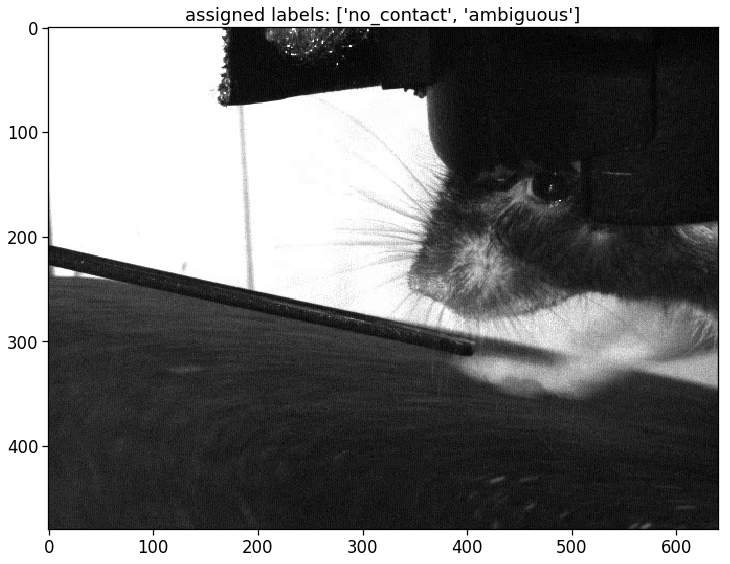

In [15]:
fig,ax=plt.subplots(figsize=(12,10))
annotation_folder = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/reannotation'
sample = annotation_summary.query('label_count > 1').sample().iloc[0]
id_string = str(sample['_id'])
print(sample['filename'])
ax.imshow(imageio.imread(os.path.join(annotation_folder,sample['folder'],sample['filename'])))
ax.set_title('assigned labels: {}'.format(sample['labels']))

In [16]:
annotations = annotations.sort_values(by=['username','timestamp'])
annotations['time_between_clicks'] = annotations['timestamp'].map(pd.to_datetime).diff().dropna().dt.total_seconds() 

In [17]:
annotations.sample(20)

,_id,username,ip,session_id,filename,frame_number,ophys_or_ephys,timestamp,annotation_label,time_between_clicks
3164,5eb5871bdb3465bf0d85cefb,peterg,unknown,750551254,oeid_750852080__frame_54889.png,54889,ophys,2020-05-08 09:21:47.711929,groom_reach_with_contact,5.456874
8104,5ebaec50db3465bf0d86a422,dougo,unknown,832883281,oeid_833631932__frame_48096.png,48096,ophys,2020-05-12 11:34:56.382122,no_contact,1.592074
12661,5ebcaa42c63d459206f9ec28,chelsean,10.128.54.180,860331718,oeid_862848066__frame_13937.png,13937,ophys,2020-05-13 19:17:38.383705,no_contact,4.849362
2117,5eb4a7cedb3465bf0d85a1dc,dougo,unknown,849600749,oeid_850489605__frame_111808.png,111808,ophys,2020-05-07 17:29:02.433821,lick_without_contact,3.217664
36164,5edfbf32f8fc887bd15073d3,katn,10.128.50.111,860331718,oeid_862848066__frame_11624.png,11624,ophys,2020-06-09 09:56:18.245080,no_contact,1.078205
1324,5eb47099bd65e4bda453c0f8,dougo,unknown,817101568,oeid_817267785__frame_101622.png,101622,ophys,2020-05-07 13:33:29.312905,paw_contact,3.410848
27683,5ecf1b3df8fc887bd14f4798,tye.johnson,10.128.54.176,959751299,oeid_960351917__frame_133863.png,133863,ophys,2020-05-27 19:00:29.339449,groom_reach_without_contact,5.105207
5545,5eb5b790db3465bf0d8635c8,katn,unknown,839951660,oeid_840157604__frame_75447.png,75447,ophys,2020-05-08 12:48:32.973914,lick_without_contact,3.779855
36228,5edfbfbdf8fc887bd1507626,katn,10.128.50.111,808092249,oeid_808621958__frame_30433.png,30433,ophys,2020-06-09 09:58:37.685384,no_contact,2.113307
20019,5ebf2a29f8fc887bd14e37d7,tye.johnson,10.128.54.176,918717544,oeid_919325908__frame_98583.png,98583,ophys,2020-05-15 16:47:53.372911,no_contact,114.669675


In [18]:
sorted_click_times = annotations.groupby('username')['time_between_clicks'].median().sort_values()
sorted_users = [user for user in sorted_click_times.index if user not in ['unknown','']]
labels = ['{}\nmedian = {:0.2f} s'.format(user, speed) for user,speed in sorted_click_times.iteritems() if user not in ['unknown','']]
sorted_users

['chelsean',
 'katn',
 'beno',
 'jackies',
 'peterg',
 'conorg',
 'paul.rhoads',
 'tye.johnson',
 'dougo',
 'corbett',
 'linzyc',
 'marinag',
 'kater',
 'taminar']

Text(0, 0.5, '')

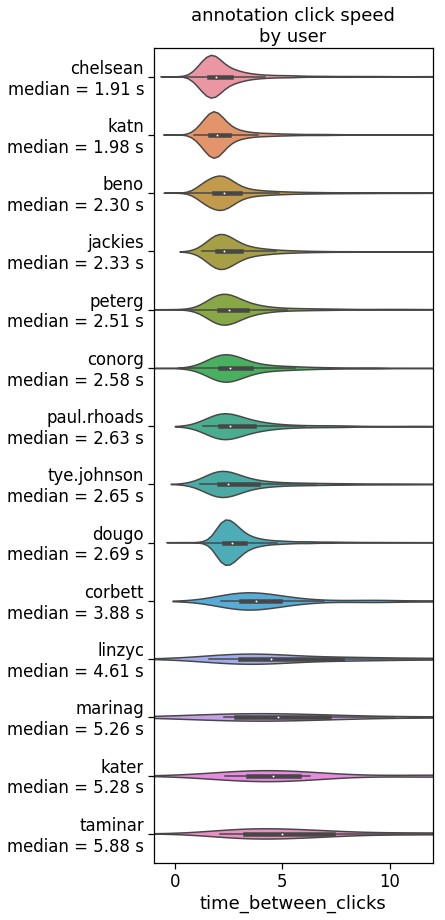

In [19]:
fig,ax=plt.subplots(figsize=(5,15))


sns.violinplot(
    data = annotations.query('time_between_clicks > 0 and time_between_clicks < 20'),
    y = 'username',
    x = 'time_between_clicks',
    ax=ax,
    order=sorted_users,
    alpha=0.5,
    orient='h'
)
ax.set_xlim(-1,12)
ax.set_yticklabels(labels)
ax.set_title('annotation click speed\nby user')
ax.set_ylabel('')